In [1]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import os


from sklearn import preprocessing
#from sklearn import StandardScaler
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from scipy import stats

from datetime import datetime

In [2]:
# import catboost
# from xgboost import XGBClassifier 
# from catboost import Pool, CatBoostClassifier,cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
# from yellowbrick.classifier import DiscriminationThreshold

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff

In [5]:
os.getcwd()

'/Users/ameyapatankar/Desktop/Git/LTFS-Hackathon'

In [6]:
os.listdir()

['LTFS',
 '.DS_Store',
 'LTFS Hackthon 01_19_20.ipynb',
 '.gitattributes',
 '.ipynb_checkpoints',
 '.git',
 'train_std.csv',
 'LTFS approach.ipynb']

In [7]:
train = pd.read_csv("/Users/ameyapatankar/Desktop/Git/LTFS-Hackathon/LTFS/train.csv")
test = pd.read_csv("/Users/ameyapatankar/Desktop/Git/LTFS-Hackathon/LTFS/test.csv")


In [8]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

Train dataset has 233154 rows and 41 columns.
There are 1 columns in train dataset with missing values.


In [8]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,233144,233145,233146,233147,233148,233149,233150,233151,233152,233153
UniqueID,420825,537409,417566,624493,539055,518279,529269,510278,490213,510980,...,613161,606146,622612,645697,613494,626432,606141,613658,548084,630213
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603,...,56059,49803,38439,72623,42894,63213,73651,33484,34259,75751
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300,...,69001,66973,52965,105405,60334,105405,100600,71212,73286,116009
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95,...,83.04,76.15,74.58,69.73,72.93,60.72,74.95,48.45,49.1,66.81
branch_id,67,67,67,67,67,67,67,67,67,67,...,34,34,34,34,34,34,34,77,77,77
supplier_id,22807,22807,22807,22807,22807,22807,22807,22807,22807,22807,...,23024,21081,20700,20700,20700,20700,23775,22186,22186,22186
manufacturer_id,45,45,45,45,45,45,45,45,45,45,...,86,45,48,48,48,48,51,86,86,86
Current_pincode_ID,1441,1502,1497,1501,1495,1501,1502,1501,1497,1492,...,1044,1051,1051,1051,1051,1050,990,2299,2299,2299
Date.of.Birth,01-01-84,31-07-85,24-08-85,30-12-93,09-12-77,08-09-90,01-06-88,04-10-89,15-11-91,01-06-68,...,15-06-63,23-12-85,23-07-82,19-06-89,08-07-93,01-08-88,05-12-88,01-06-76,26-03-94,18-02-84
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried,...,Salaried,Self employed,Self employed,Salaried,Salaried,Salaried,Self employed,Salaried,Salaried,Salaried


### We can see that there are a lot of Categorical variables
* branch_id
* supplier_id
* manufacturere_id
* Pincode
* Employment type
* Moble, PAN, Aadhar , Driving, Passport flags
* Employee ID
* State ID
* Credit score description

### Other Columns are integers and objects and can be used after some preprocessing


In [9]:
train.shape

(233154, 41)

In [10]:
train['loan_default'].value_counts(normalize = True)

0    0.782929
1    0.217071
Name: loan_default, dtype: float64

# 1. Data preprocessing

In [11]:
train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'],format = '%d-%m-%y')

In [12]:
train['Date.of.Birth'].head(n=15)

0    1984-01-01
1    1985-07-31
2    1985-08-24
3    1993-12-30
4    1977-12-09
5    1990-09-08
6    1988-06-01
7    1989-10-04
8    1991-11-15
9    2068-06-01
10   1979-01-01
11   1984-09-07
12   1974-06-01
13   1984-08-16
14   1973-02-18
Name: Date.of.Birth, dtype: datetime64[ns]

* We can see that some dates have years greater than the current year. Offset these years by 100 to calculate the applicant's age 

In [13]:
def format_date(col):
    temp = []
    for x in col:
        if x > pd.to_datetime('today'):    temp.append(x - pd.DateOffset(years=100))
        else:                              temp.append(x)
    return temp

In [14]:
%%time

train['Date.of.Birth'] = format_date(train['Date.of.Birth'])

CPU times: user 28.4 s, sys: 168 ms, total: 28.5 s
Wall time: 28.9 s


In [15]:
def calculateage(v):
    return pd.to_datetime('today').year - pd.to_datetime(v).year 
    
# # Data['age'] = Data['Date.of.Birth'].apply(calculateage)


In [16]:
train['age'] = train['Date.of.Birth'].apply(calculateage)

In [17]:
train.age.head(n=15)

0     36
1     35
2     35
3     27
4     43
5     30
6     32
7     31
8     29
9     52
10    41
11    36
12    46
13    36
14    47
Name: age, dtype: int64

## Calculating total account age in months


In [18]:
train['average.acct.age']= train['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(" ")[0][:-3])*12
                                                         +int(x.split(" ")[1][:-3]))


In [19]:
train['average.acct.age'].head()

0     0
1    23
2     0
3     8
4     0
Name: average.acct.age, dtype: int64

## Calculating total crdit history age in months


In [20]:
train['credit.history.length'] = train['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(" ")[0][:-3])*12 + 
                                                                    int(x.split(" ")[1][:-3]))

In [21]:
train['credit.history.length'].head(n=10)

0     0
1    23
2     0
3    15
4     0
5    24
6     0
7     2
8    56
9    19
Name: credit.history.length, dtype: int64

## Calcculate time from the day of disbursal or how long ago the loan was disbursed

In [22]:
def calculatetime(v):
    return pd.to_datetime('26-04-2019') - pd.to_datetime(v)  

In [23]:
import time

start_time = time.time()

train['Disbursal_time'] = train['DisbursalDate'].apply(calculatetime)

print("Execution time: " + str((time.time() - start_time)/60) + 'minutes')

Execution time: 1.4926315625508626minutes


In [24]:
train['Disbursal_time'] = train['Disbursal_time'].dt.days

In [25]:
train.Disbursal_time.head()

0    414
1    212
2    473
3    182
4    212
Name: Disbursal_time, dtype: int64

## Filling Other in Employment type where NA present

In [26]:
train['Employment.Type'].isna().sum()

7661

In [27]:
train['Employment.Type'].fillna('Other',inplace=True)

# emp = {'Other':0,'Self employed':2,'Salaried':1}

# train['Employment.Type']= train['Employment.Type'].map(emp)

In [28]:
train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Other              7661
Name: Employment.Type, dtype: int64

## Creating dummy columns for Score Description

In [29]:
train['PERFORM_CNS.SCORE.DESCRIPTION'].replace({'C-Very Low Risk':'Very Low Risk',
                                               'A-Very Low Risk':'Very Low Risk',
                                               'D-Very Low Risk':'Very Low Risk',
                                               'B-Very Low Risk':'Very Low Risk',
                                               'M-Very High Risk':'Very High Risk',
                                               'L-Very High Risk':'Very High Risk',
                                               'F-Low Risk':'Low Risk','G-Low Risk':'Low Risk',
                                               'E-Low Risk':'Low Risk',
                                               'H-Medium Risk':'Medium Risk','I-Medium Risk':'Medium Risk',
                                               'J-High Risk':'High Risk','K-High Risk':'High Risk',
                                               'No Bureau History Available':'No History'
                                               },inplace=True)
train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not.+','Not Scored',regex = True,inplace = True)

train['Very_Low']=np.where(train['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very Low'),1,0)
train['Low']=np.where(train['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Low'),1,0)
train['Medium']=np.where(train['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Medium'),1,0)
train['High']=np.where(train['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('High'),1,0)
train['Very_High']=np.where(train['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very High'),1,0)
train['Not_Scored']=np.where(train['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Not Scored'),1,0)
train['No_History']=np.where(train['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('No Bureau'),1,0)


In [30]:
train['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts(normalize=True)

No History        0.501600
Very Low Risk     0.217573
Low Risk          0.078463
Not Scored        0.055049
Medium Risk       0.053235
High Risk         0.051575
Very High Risk    0.042504
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: float64

## Adding Secondary Accounts and Primary accounts Data

In [31]:
train['ACTIVE.ACCTS']=train['PRI.ACTIVE.ACCTS']+train['SEC.ACTIVE.ACCTS']
train['CURRENT.BALANCE']=train['PRI.CURRENT.BALANCE']+train['SEC.CURRENT.BALANCE']
train['DISBURSED.AMOUNT']=train['PRI.DISBURSED.AMOUNT']+train['SEC.DISBURSED.AMOUNT']
train['NO.OF.ACCTS']=train['SEC.NO.OF.ACCTS']+train['PRI.NO.OF.ACCTS']
train['OVERDUE.ACCTS']=train['PRI.OVERDUE.ACCTS']+train['SEC.OVERDUE.ACCTS']
train['SANCTIONED.AMOUNT']=train['PRI.SANCTIONED.AMOUNT']+train['SEC.SANCTIONED.AMOUNT']
train['INSTAL.AMT']=train['PRIMARY.INSTAL.AMT']+train['SEC.INSTAL.AMT']


In [32]:
train['PERFORM_CNS.SCORE'].head(n=10)

0      0
1    598
2      0
3    305
4      0
5    825
6      0
7     17
8    718
9    818
Name: PERFORM_CNS.SCORE, dtype: int64

## Creating categoties for ltv and CNS score 

In [33]:
train['PERFORM_CNS.SCORE.BINS']= pd.cut(train['PERFORM_CNS.SCORE'],5,
                                      labels=['Slim','Doubtful','Fair','Good','Great']).astype(np.object)

train['ltv.BINS']= pd.cut(train['ltv'],3,labels=['Low','Medium','High']).astype(np.object)



In [34]:
train['ltv.BINS'].tail(), train['PERFORM_CNS.SCORE.BINS'].head()

(233149    Medium
 233150      High
 233151    Medium
 233152    Medium
 233153      High
 Name: ltv.BINS, dtype: object, 0        Slim
 1        Good
 2        Slim
 3    Doubtful
 4        Slim
 Name: PERFORM_CNS.SCORE.BINS, dtype: object)

## Adding total identification available for the applicant

In [35]:
train['Total_Flag']=train['Driving_flag']+train['Aadhar_flag']+train['PAN_flag']+train['Passport_flag']+train['VoterID_flag']

## Calculating Asset value and Value cost from the LTV 
* LTV is the ratio of Mortgage amount to the Value of the Asset. 
* Higher the LTV higher the risk as more amount is lended

In [36]:
train['asset_value']=(train['disbursed_amount']*100)/(train['ltv'])
train['value_cost']= train['asset_cost']- train['asset_value']


In [37]:
train.asset_value.head(),train.value_cost.head()

(0    56480.178671
 1    64379.352724
 2    59442.151065
 3    65001.130199
 4    59257.834597
 Name: asset_value, dtype: float64, 0    1919.821329
 1    1170.647276
 2    1917.848935
 3    1111.869801
 4    1042.165403
 Name: value_cost, dtype: float64)

In [38]:
train['SANCTIONED.AMOUNT'].tail(n=10),train['DISBURSED.AMOUNT'].tail(n=10)

(233144         0
 233145     85629
 233146     14839
 233147    276624
 233148         0
 233149    416133
 233150         0
 233151         0
 233152         0
 233153         0
 Name: SANCTIONED.AMOUNT, dtype: int64, 233144         0
 233145     80226
 233146     14839
 233147    237977
 233148         0
 233149    416133
 233150         0
 233151         0
 233152         0
 233153         0
 Name: DISBURSED.AMOUNT, dtype: int64)

## Calculating amount Disbursed from the amount Sanctioned
* For some entire amount is disbursed while for some only some amount is disbursed

In [39]:
train['SANCTION_DISBURSED']=train['SANCTIONED.AMOUNT']-train['DISBURSED.AMOUNT']

In [40]:
train['NO.OF.ACCTS'].tail(n=10)

233144    0
233145    7
233146    2
233147    4
233148    0
233149    4
233150    1
233151    0
233152    0
233153    0
Name: NO.OF.ACCTS, dtype: int64

## Some more Feature Engineering

In [41]:
train['NO_DEACTIVE_ACCOUNTS']=train['NO.OF.ACCTS']-train['ACTIVE.ACCTS']
train['NO.OF.ACC.BEF.SIX.MONTH']=train['NO.OF.ACCTS']-train['NEW.ACCTS.IN.LAST.SIX.MONTHS']
train['OVERDUE.ACC.BEF.SIX.MONTHS']=train['OVERDUE.ACCTS']-train['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
train['CLEAN.ACC']=train['NO.OF.ACCTS']-(train['ACTIVE.ACCTS']+train['OVERDUE.ACCTS'])

## Converting the Categorical variables to object data type

In [42]:
for i in [ 'Aadhar_flag', 'Driving_flag', 'PAN_flag', 'Passport_flag', 'VoterID_flag','Current_pincode_ID','branch_id',
         'supplier_id','manufacturer_id','Employment.Type','State_ID','Employee_code_ID','Total_Flag',
         'ltv.BINS','PERFORM_CNS.SCORE.BINS']:
    
    train[i]=train[i].astype(np.object)

In [43]:
train.shape


(233154, 69)

In [44]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE.BINS,ltv.BINS,Total_Flag,asset_value,value_cost,SANCTION_DISBURSED,NO_DEACTIVE_ACCOUNTS,NO.OF.ACC.BEF.SIX.MONTH,OVERDUE.ACC.BEF.SIX.MONTHS,CLEAN.ACC
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,Slim,High,1,56480.178671,1919.821329,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,Good,High,1,64379.352724,1170.647276,0,0,1,0,-1
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,Slim,High,1,59442.151065,1917.848935,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,Doubtful,High,1,65001.130199,1111.869801,0,3,3,0,3
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,Slim,High,1,59257.834597,1042.165403,0,0,0,0,0


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 69 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null object
supplier_id                            233154 non-null object
manufacturer_id                        233154 non-null object
Current_pincode_ID                     233154 non-null object
Date.of.Birth                          233154 non-null datetime64[ns]
Employment.Type                        233154 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null object
Employee_code_ID                       233154 non-null object
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag     

# Data Visualizations and Grapth to see how the Data is dor different variables

In [46]:
train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'age', 'average.acct.age', 'credit.history.length',
       'Disbursal_time', 'Very_Low', 'Low', 

In [47]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,233144,233145,233146,233147,233148,233149,233150,233151,233152,233153
UniqueID,420825,537409,417566,624493,539055,518279,529269,510278,490213,510980,...,613161,606146,622612,645697,613494,626432,606141,613658,548084,630213
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603,...,56059,49803,38439,72623,42894,63213,73651,33484,34259,75751
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300,...,69001,66973,52965,105405,60334,105405,100600,71212,73286,116009
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95,...,83.04,76.15,74.58,69.73,72.93,60.72,74.95,48.45,49.1,66.81
branch_id,67,67,67,67,67,67,67,67,67,67,...,34,34,34,34,34,34,34,77,77,77
supplier_id,22807,22807,22807,22807,22807,22807,22807,22807,22807,22807,...,23024,21081,20700,20700,20700,20700,23775,22186,22186,22186
manufacturer_id,45,45,45,45,45,45,45,45,45,45,...,86,45,48,48,48,48,51,86,86,86
Current_pincode_ID,1441,1502,1497,1501,1495,1501,1502,1501,1497,1492,...,1044,1051,1051,1051,1051,1050,990,2299,2299,2299
Date.of.Birth,1984-01-01 00:00:00,1985-07-31 00:00:00,1985-08-24 00:00:00,1993-12-30 00:00:00,1977-12-09 00:00:00,1990-09-08 00:00:00,1988-06-01 00:00:00,1989-10-04 00:00:00,1991-11-15 00:00:00,1968-06-01 00:00:00,...,1963-06-15 00:00:00,1985-12-23 00:00:00,1982-07-23 00:00:00,1989-06-19 00:00:00,1993-07-08 00:00:00,1988-08-01 00:00:00,1988-12-05 00:00:00,1976-06-01 00:00:00,1994-03-26 00:00:00,1984-02-18 00:00:00
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried,...,Salaried,Self employed,Self employed,Salaried,Salaried,Salaried,Self employed,Salaried,Salaried,Salaried


In [48]:
#Selecting columns to for Training set

data_copy = train.drop(['Date.of.Birth','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH',
                   'PERFORM_CNS.SCORE.DESCRIPTION','UniqueID','MobileNo_Avl_Flag']
                       ,axis = 1)

In [49]:
data_copy.shape

(233154, 62)

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Count')

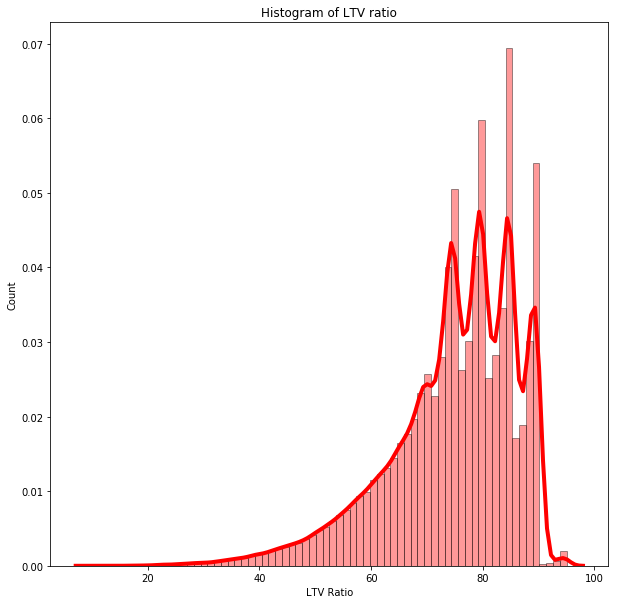

In [50]:
plt.figure(figsize= (10,10))

sns.distplot(train.ltv, hist=True, kde=True, 
             bins= 70, color = 'red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Histogram of LTV ratio')
plt.xlabel('LTV Ratio')
plt.ylabel('Count')

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Count')

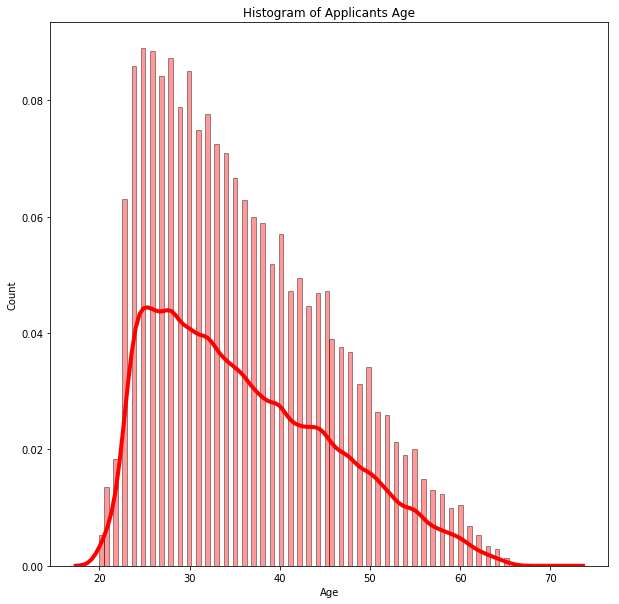

In [51]:
plt.figure(figsize= (10,10))

sns.distplot(train.age, hist=True, kde=True, 
             bins= 100, color = 'red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Histogram of Applicants Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0,0.5,'Count')

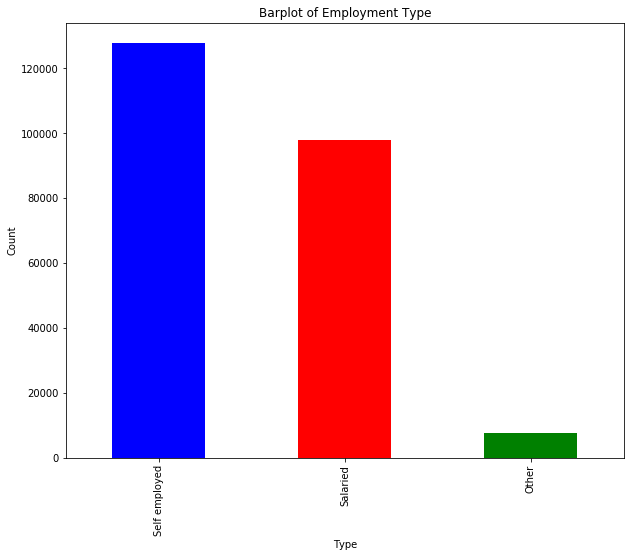

In [52]:
plt.figure(figsize= (10,8))

# colors = {'Salaried':'blue', 'Self Employed':'blue', 'Other':'green'}


train['Employment.Type'].value_counts().plot(kind='bar',color=['blue', 'red', 'green'])
plt.title('Barplot of Employment Type')
plt.xlabel('Type')
plt.ylabel('Count')

(5.328750520529166,
 0.149247654843698,
 3,
 array([[1.67068411e+05, 4.63205893e+04],
        [1.52154398e+04, 4.21856015e+03],
        [2.56017744e+02, 7.09822564e+01],
        [3.13171552e+00, 8.68284482e-01]]))

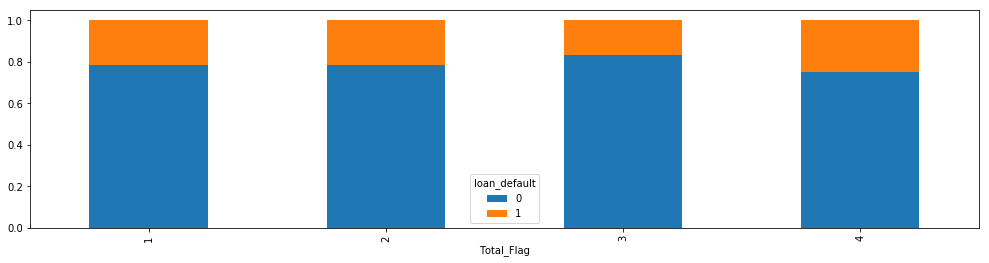

In [53]:
ct=pd.crosstab(train.Total_Flag, train.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
# from scipy import stats
stats.chi2_contingency(ct)


Text(0.5,1,'Count by Manufacturer ID')

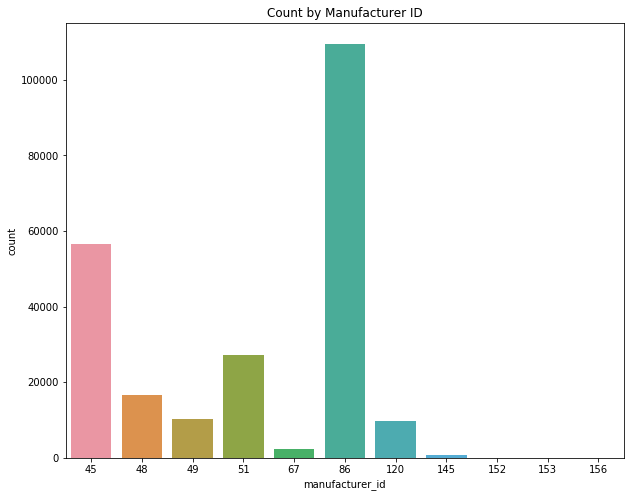

In [54]:
plt.figure(figsize= (10,8))

sns.countplot(x=train.manufacturer_id)
plt.title('Count by Manufacturer ID')

(2023.4560779471472, 0.0, 6, array([[ 9414.71977749,  2610.28022251],
        [14322.90092385,  3971.09907615],
        [ 9717.7132539 ,  2694.2867461 ],
        [91563.5324721 , 25386.4675279 ],
        [10048.89216998,  2786.10783002],
        [ 7758.82519708,  2151.17480292],
        [39716.4162056 , 11011.5837944 ]]))

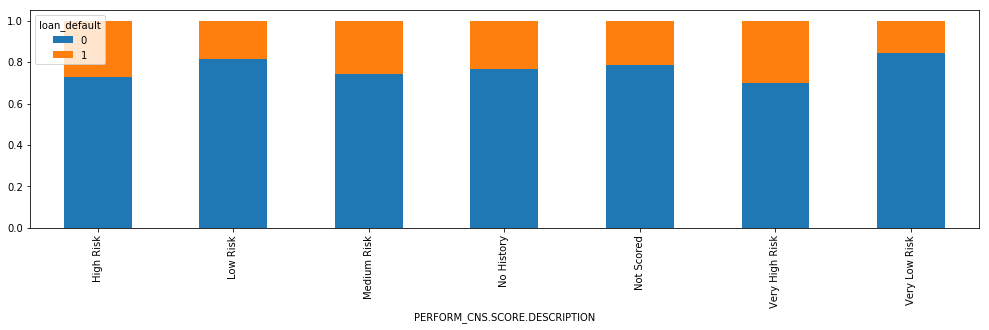

In [55]:
ct=pd.crosstab(train['PERFORM_CNS.SCORE.DESCRIPTION'], train['loan_default'])
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
# from scipy import stats
stats.chi2_contingency(ct)

In [56]:
data_copy.select_dtypes(include=['object']).head()

,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE.BINS,ltv.BINS,Total_Flag
0,67,22807,45,1441,Salaried,6,1998,1,0,0,0,0,Slim,High,1
1,67,22807,45,1502,Self employed,6,1998,1,0,0,0,0,Good,High,1
2,67,22807,45,1497,Self employed,6,1998,1,0,0,0,0,Slim,High,1
3,67,22807,45,1501,Self employed,6,1998,1,0,0,0,0,Doubtful,High,1
4,67,22807,45,1495,Self employed,6,1998,1,0,0,0,0,Slim,High,1


In [57]:
# data_copy['ltv.BINS'].head(n= 55)

## Categorical Data for Logistic Regression and other algorithms (XGB Random Forest) has been converted to dummy variables 
## For the training the model. Other Categorical data has been excluded whcih will be inculded in CatBoost Classifier.


In [58]:
train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'age', 'average.acct.age', 'credit.history.length',
       'Disbursal_time', 'Very_Low', 'Low', 

## Training data for XGBoost, Logistic, and Random Forest

In [59]:
train['CREDIT.HISTORY.LENGTH'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     1yrs 3mon
4     0yrs 0mon
Name: CREDIT.HISTORY.LENGTH, dtype: object

In [60]:
data_model = train.drop(['UniqueID','branch_id','supplier_id',
                         'manufacturer_id','Current_pincode_ID','Date.of.Birth',
                         'DisbursalDate','Employee_code_ID','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 
                         'VoterID_flag','Driving_flag', 'Passport_flag','State_ID','PERFORM_CNS.SCORE.DESCRIPTION',
                         'AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']
                       ,axis = 1)

# data_copy = train.drop(['Date.of.Birth','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH',
#                    'PERFORM_CNS.SCORE.DESCRIPTION','UniqueID','MobileNo_Avl_Flag']
#                        ,axis = 1)
print(data_model.shape)



(233154, 51)


In [61]:
data_model.select_dtypes(include=['object']).head(7)

,Employment.Type,PERFORM_CNS.SCORE.BINS,ltv.BINS,Total_Flag
0,Salaried,Slim,High,1
1,Self employed,Good,High,1
2,Self employed,Slim,High,1
3,Self employed,Doubtful,High,1
4,Self employed,Slim,High,1
5,Self employed,Great,High,1
6,Salaried,Slim,High,1


In [62]:
data_model['PERFORM_CNS.SCORE.BINS'].value_counts()

Slim        129785
Great        44946
Good         39532
Doubtful     10036
Fair          8855
Name: PERFORM_CNS.SCORE.BINS, dtype: int64

In [63]:
emp = {'Other':0,'Self employed':2,'Salaried':1}

ltv = {'High':3 , 'Medium': 2, 'Low' : 1}

cns_score = {'Great' : 5, 'Good' : 4, 'Fair' : 3, 'Slim' : 2 , 'Doubtful' : 1 }

data_model['Employment.Type'] = data_model['Employment.Type'].map(emp)
data_model['PERFORM_CNS.SCORE.BINS'] = data_model['PERFORM_CNS.SCORE.BINS'].map(cns_score)
data_model['ltv.BINS'] = data_model['ltv.BINS'].map(ltv)

data_model['Total_Flag'] = data_model['Total_Flag'].astype(int)

In [64]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 51 columns):
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
Employment.Type                        233154 non-null int64
PERFORM_CNS.SCORE                      233154 non-null int64
PRI.NO.OF.ACCTS                        233154 non-null int64
PRI.ACTIVE.ACCTS                       233154 non-null int64
PRI.OVERDUE.ACCTS                      233154 non-null int64
PRI.CURRENT.BALANCE                    233154 non-null int64
PRI.SANCTIONED.AMOUNT                  233154 non-null int64
PRI.DISBURSED.AMOUNT                   233154 non-null int64
SEC.NO.OF.ACCTS                        233154 non-null int64
SEC.ACTIVE.ACCTS                       233154 non-null int64
SEC.OVERDUE.ACCTS                      233154 non-null int64
SEC.CURRENT.BALANCE              

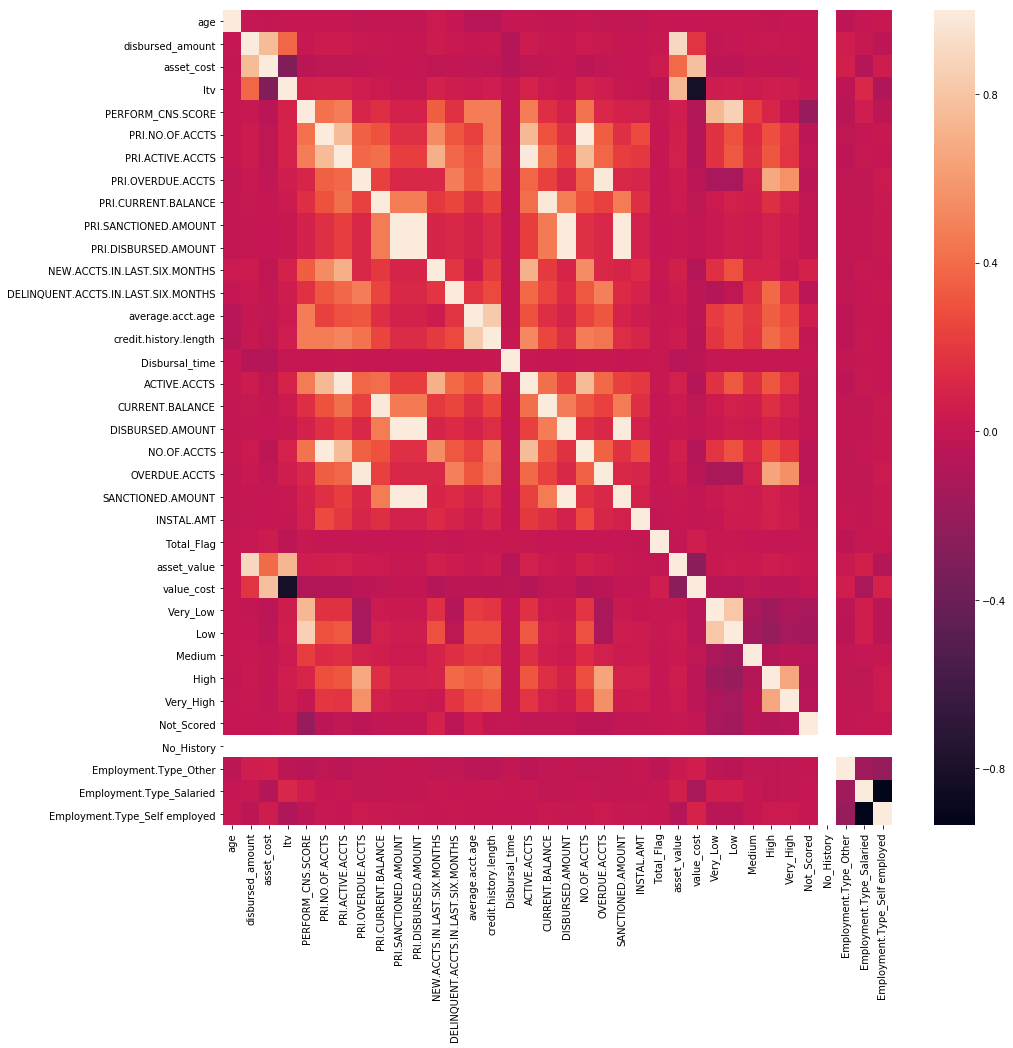

In [155]:
plt.figure(figsize = (15,15))
sns.heatmap(Data_corr.corr())

## All the variables have been converted to int or float data type and can be used now for model building. We will start with XGBoost, Logiistic and Random Forest classifiers

#  2. MODEL BUILDING 
    

In [65]:
data_model.shape

(233154, 51)

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
    
# data_model_std = scaler.fit_transform(data_model)

In [67]:
data_model_std

NameError: name 'data_model_std' is not defined

In [84]:
X,y = data_model.drop('loan_default',axis=1),data_model['loan_default']

X_std = scaler.fit_transform(X)

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994)

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [70]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "XGBClassifier": XGBClassifier(),
    "RandomForest": RandomForestClassifier()
}


In [71]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyboardInterrupt: 

In [77]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
print(log_reg)

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [78]:
log_reg

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
log_reg.fit(X_train,y_train)

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
predictions   = log_reg.predict(X_val)
probabilities = log_reg.predict_proba(X_val)

In [79]:
def loan_default_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot):
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        

In [92]:
print ("\n Classification report : \n",classification_report(y_val,predictions))
print ("Accuracy   Score : ",accuracy_score(y_val,predictions))
    #confusion matrix
conf_matrix = confusion_matrix(y_val,predictions)
    #roc_auc_score
model_roc_auc = roc_auc_score(y_val,predictions) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_val,probabilities[:,1])


 Classification report : 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     54720
           1       0.00      0.00      0.00     15227

   micro avg       0.78      0.78      0.78     69947
   macro avg       0.39      0.50      0.44     69947
weighted avg       0.61      0.78      0.69     69947

Accuracy   Score :  0.7822780104936595
Area under curve :  0.4999817251461988 



In [94]:
trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,2)
fig.append_trace(trace4,2,1)
    
fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
py.iplot(fig)

NameError: name 'coef_sumry' is not defined

### Random Search for XGBoost as GridSearch will take a long time due to the large number of hyperparameters

In [95]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }



In [96]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [97]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=param_comb, 
                                    scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), 
                                   verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  2.5min finished



 Time taken: 0 hours 3 minutes and 17.18 seconds.


In [139]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([27.00073306, 41.35027909, 39.000729  , 30.56037998, 38.26697795]), 'std_fit_time': array([0.12535039, 1.53137401, 1.61647888, 0.62996356, 0.39193424]), 'mean_score_time': array([0.25843565, 0.39976056, 0.35791826, 0.38323394, 0.27571003]), 'std_score_time': array([0.00668106, 0.04791286, 0.00462071, 0.04136837, 0.00951639]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
         

In [143]:
xg_boost = random_search.best_estimator_

In [140]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear 

Logistic Regression Cross Validation Score:  78.32%


In [144]:
xgb_score = cross_val_score(xg_boost, X_train, y_train, cv=5)
print('XGBoost Cross Validation Score: ', round(xgb_score.mean() * 100, 2).astype(str) + '%')


XGBoost Cross Validation Score:  78.33%


In [151]:
train.memory_usage()

Index                             128
UniqueID                      1865232
disbursed_amount              1865232
asset_cost                    1865232
ltv                           1865232
                               ...   
SANCTION_DISBURSED            1865232
NO_DEACTIVE_ACCOUNTS          1865232
NO.OF.ACC.BEF.SIX.MONTH       1865232
OVERDUE.ACC.BEF.SIX.MONTHS    1865232
CLEAN.ACC                     1865232
Length: 70, dtype: int64

# Trying CatBoost algorithm

In [147]:
import catboost

AttributeError: type object '_catboost._FloatArrayWrapper' has no attribute '__reduce_cython__'

In [74]:
X,y = data_copy.drop('loan_default',axis=1),train['loan_default']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994)


In [75]:
categorical_features_indices = np.where(data_copy.dtypes =='object')[0]
categorical_features_indices


array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 52, 53, 54])

In [76]:
len(categorical_features_indices)

15

### Hyperparameter - learning_rate

In [166]:
import catboost

class ModelOptimizer:
    best_score = None
    opt = None
    
    def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=3, seed=1994, early_stopping_rounds=30, is_stratified=True, is_shuffle=True):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.categorical_columns_indices = categorical_columns_indices
        self.n_fold = n_fold
        self.seed = seed
        self.early_stopping_rounds = early_stopping_rounds
        self.is_stratified = is_stratified
        self.is_shuffle = is_shuffle
        
        
    def update_model(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self.model, k, v)
            
    def evaluate_model(self):
        pass
    
    def optimize(self, param_space, max_evals=10, n_random_starts=2):
        start_time = time.time()
        
        @use_named_args(param_space)
        def _minimize(**params):
            self.model.set_params(**params)
            return self.evaluate_model()
        
        opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405, n_jobs=-1)
        best_values = opt.x
        optimal_values = dict(zip([param.name for param in param_space], best_values))
        best_score = opt.fun
        self.best_score = best_score
        self.opt = opt
        
        print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, time.time() - start_time))
        print('updating model with optimal values')
        self.update_model(**optimal_values)
        plot_convergence(opt)
        return optimal_values
    
class CatboostOptimizer(ModelOptimizer):
    def evaluate_model(self):
        validation_scores = catboost.cv(
        catboost.Pool(self.X_train, 
                      self.y_train, 
                      cat_features=self.categorical_columns_indices),
        self.model.get_params(), 
        nfold=self.n_fold,
        stratified=self.is_stratified,
        seed=self.seed,
        early_stopping_rounds=self.early_stopping_rounds,
        shuffle=self.is_shuffle,
        verbose=100,
        plot=False)
        self.scores = validation_scores
        test_scores = validation_scores.iloc[:, 2]
        best_metric = test_scores.max()
        return 1 - best_metric

AttributeError: type object '_catboost._FloatArrayWrapper' has no attribute '__reduce_cython__'

In [77]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
import time

In [67]:
model = CatBoostClassifier(subsample=0.9, 
                           custom_loss='Logloss',
                           l2_leaf_reg = 10,
                           random_strength = 0,
                           max_depth=7,
                           eval_metric="AUC",
                           learning_rate=0.01,
                           iterations=10000,
                           bootstrap_type='Bernoulli',
                           task_type="GPU",
                           random_seed=42,
                           od_type="Iter",
                           border_count=128
                          )


### Logistic Regression with PySpark